In [13]:
import numpy as np
import networkx as nx
import json

In [14]:
def build_matrix(network, pages):
    matrix = []
    for i, key in zip(network, pages):
        row = []
        for k in pages:
            if(k in i[key]):
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)
    matrix = np.array(matrix)
    return matrix

In [15]:
def draw(pages,matrix):
    labels={}
    for i in range(len(pages)):
        labels[i]=pages[i]
    G = nx.from_numpy_array(matrix, create_using = nx.MultiDiGraph())
    nx.draw(G,node_color='r', node_size=600, alpha=0.8 ,labels=labels )

In [16]:
def pageRank (a,lamBda,epsilon,pages):
    
    #initialisation
    N = len(a)
    rpr = (1-lamBda)/N
    P = np.zeros((N,N))
    #computing the transitional probability 
    for i in range(N):
        sAij=sum(a[i,:])
        if sAij==0:
            P[i,:]=1/N
        else:
            for j in range(N):
                P[i,j]=(a[i,j]/sum(a[i,:]))*lamBda + rpr
    
    #calculation PR Vector
    P=np.matrix(P)
    R=[1/N for k in range(N)]
    i=1
    test = True
    while test:
        PR=R@P
        if np.linalg.norm((R - PR))<epsilon:
            test = False
        i+=1
        R=PR.copy()
        

    #presentation   
    print(f' {i} iterations.\n')
    dicts = {}
    i=0
    for page in pages:
        dicts[page]=round(PR[0,i],3)
        i+=1
    print(sorted(dicts.items(), key=lambda dicts: dicts[1] , reverse=True))

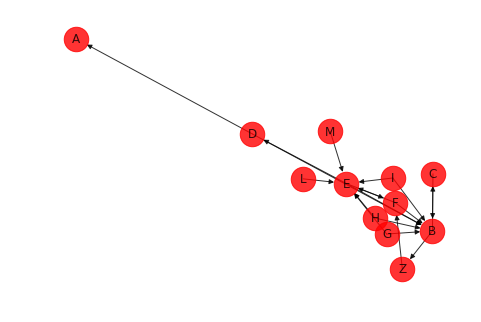

In [17]:
#get the json file
with open("data_json - Copie.json" , encoding='UTF-8') as file:
    network = json.loads(file.read())
#extract the pages name
pages=[k for d in network for k in d.keys()]
#build The adjacency matrix
matrix = build_matrix(network, pages)

#draw the graph
draw(pages,matrix)

In [18]:
lamBda = 0.85
epsilon = 10**(-6)
pageRank(matrix,lamBda,epsilon,pages)

 25 iterations.

[('B', 0.276), ('F', 0.164), ('C', 0.132), ('Z', 0.132), ('E', 0.13), ('D', 0.052), ('A', 0.037), ('G', 0.015), ('H', 0.015), ('I', 0.015), ('L', 0.015), ('M', 0.015)]
